# Analyse der realen Bilder

In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Laden der Bilder:

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg')):
            img_path = os.path.join(folder, filename)
            images.append(img_path)
    return images


Funktion um zufällig Bilder anzuzeigen:

In [3]:
def show_random_images(images, n=40):
    if len(images) < n:
        print(f"Es sind nur {len(images)} Bilder im Verzeichnis vorhanden.")
        n = len(images)
    
    selected_images = random.sample(images, n)
    cols = 8
    rows = (n + cols - 1) // cols  # Aufrunden der Anzahl der Zeilen
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    for ax, img_path in zip(axes.flat, selected_images):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(os.path.basename(img_path), fontsize=8)
    
    for ax in axes.flat[len(selected_images):]:
        ax.axis('off')  # Deaktivieren der nicht verwendeten Subplots
    
    plt.tight_layout()
    plt.show()

Ausgabe der zufälligen realen Bilder:

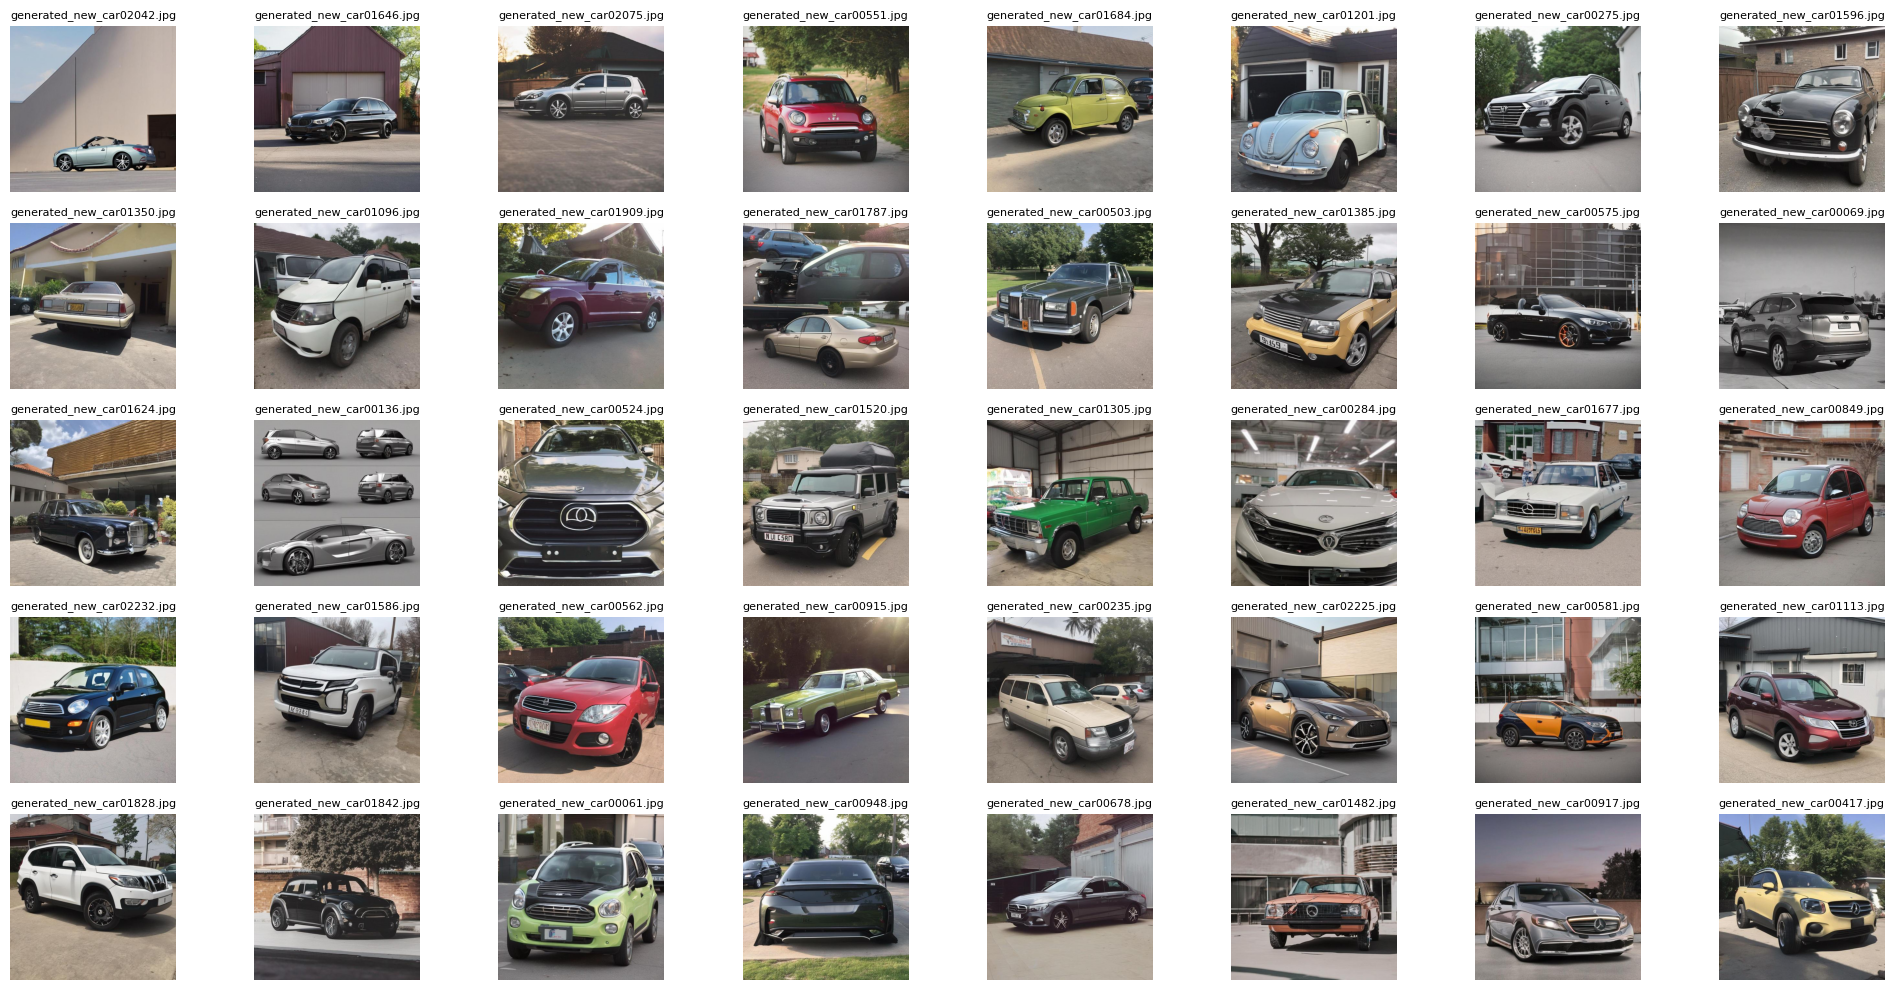

In [8]:
# Bilderverzeichnis
image_folder = "../images/car/preprocessed_512x/train/fake"

# Bilder laden
image_paths = load_images_from_folder(image_folder)

# Überprüfen, ob Bilder vorhanden sind
if image_paths:
    # Zufällige Bilder anzeigen
    show_random_images(image_paths, 40)

Visualisierung der Auflösungen im Datensatz der realen Bilder:

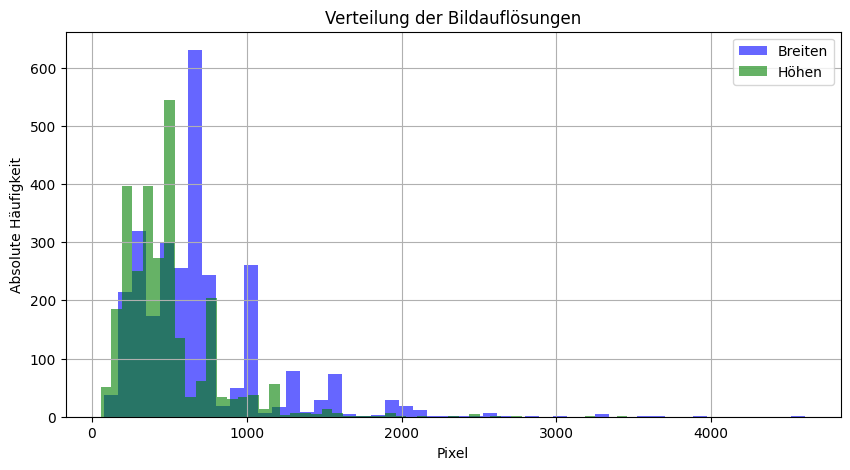

In [5]:
def plot_image_resolutions(directory):
    # Liste zur Speicherung der Auflösungen
    resolutions = []

    # Durch den Ordner iterieren und für jedes Bild die Auflösung erfassen
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            try:
                with Image.open(os.path.join(directory, filename)) as img:
                    resolutions.append(img.size) 
            except Exception as e:
                print(f"Error opening {filename}: {e}")

    # Auflösungen extrahieren
    widths, heights = zip(*resolutions)

    # Erstellen des Plots für die Breiten
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=50, alpha=0.6, color='blue', label='Breiten')
    plt.hist(heights, bins=50, alpha=0.6, color='green', label='Höhen')
    plt.title('Verteilung der Bildauflösungen')
    plt.xlabel('Pixel')
    plt.ylabel('Absolute Häufigkeit')
    plt.legend()
    plt.grid(True)
    plt.show()

# Pfad zum Ordner mit den Bildern
directory_path = '../images/car/Fake-Real/real'
plot_image_resolutions(directory_path)
